In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [52]:
# Load the dataset
original_file = pd.read_csv(r"D:\Materials\Academic\Semester 8\AI and ML\Coding\Datasets\Deformation ML File.csv")

In [53]:
original_file.head()

,stiffener_height_mm,plate_thickness_mm,stiffener_thickess_mm,pressure_mm,deformation_mm,mass_kg
0,40.6875,2.389063,1.895312,0.050469,3.748899,2.403142
1,45.6875,2.173437,1.904688,0.098281,9.382610,2.252441
2,35.1875,2.454687,2.129688,0.061406,4.329086,2.452294
3,43.4375,3.073437,1.979688,0.058281,2.137503,3.039688
4,35.8125,3.251562,1.154688,0.053281,2.034908,3.021081


In [54]:
output = original_file.pop('deformation_mm')
input = original_file

In [55]:
input_train_data,input_test_data,output_train_data,output_test_data = train_test_split(input,output,test_size=0.2,random_state=42)

In [62]:
polynomial = PolynomialFeatures(degree=2)

In [64]:
input_train_data_poly = polynomial.fit_transform(input_train_data)

input_test_data_poly = polynomial.transform(input_test_data)

In [66]:
model = LinearRegression()

In [68]:
# Train the model

model.fit(input_train_data_poly,output_train_data)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
test_predictions = model.predict(input_test_data_poly)
test_metrics = {
    "MSE": mean_squared_error(output_test_data, test_predictions),
    "MAE": mean_absolute_error(output_test_data, test_predictions),
    "R2": r2_score(output_test_data, test_predictions),
    "MAPE": mean_absolute_percentage_error(output_test_data, test_predictions)
}

print(test_metrics)

{'MSE': 0.02175406910548045, 'MAE': 0.12819877505319716, 'R2': 0.9941960633920779, 'MAPE': 0.030957371295513937}


In [72]:
train_predictions = model.predict(input_train_data_poly)
train_metrics = {
    "MSE": mean_squared_error(output_train_data, train_predictions),
    "MAE": mean_absolute_error(output_train_data, train_predictions),
    "R2": r2_score(output_train_data, train_predictions),
    "MAPE": mean_absolute_percentage_error(output_train_data, train_predictions)
}

print(train_metrics)


{'MSE': 0.017599115789627993, 'MAE': 0.10880630085624556, 'R2': 0.9958477457459195, 'MAPE': 0.03239545879936738}


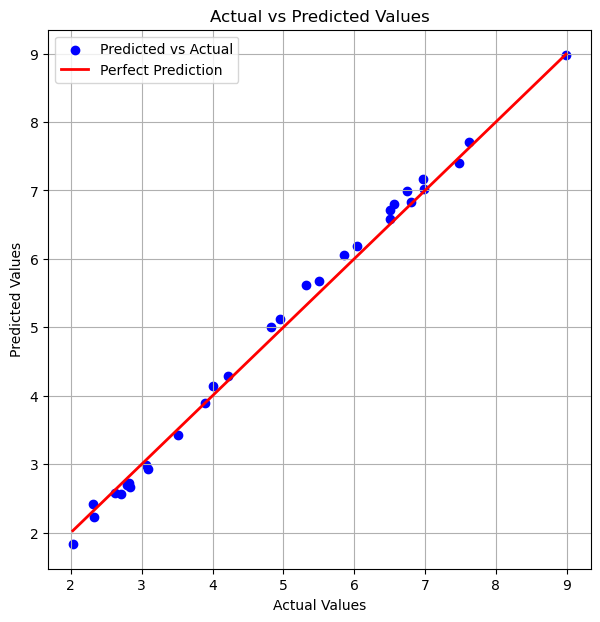

In [74]:
plt.figure(figsize=(7,7))
plt.scatter(output_test_data, test_predictions, color='blue', label='Predicted vs Actual')
plt.plot([output_test_data.min(), output_test_data.max()],
         [output_test_data.min(), output_test_data.max()],
         color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()